In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings

In [3]:
warnings.filterwarnings("ignore")
color = sns.color_palette()
%matplotlib inline

In [4]:
#increase the field_size_limit

import sys
import csv
maxInt = sys.maxsize
decrement = True

while decrement:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    decrement = False
    try:
        csv.field_size_limit(maxInt)
    except OverflowError:
        maxInt = int(maxInt/10)
        decrement = True

In [5]:
trainV = pd.read_csv("training_variants.csv")

In [6]:
trainV.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [7]:
trainV.shape

(3321, 4)

In [8]:
def read_this_funky_csv(source):
  # be sure to pass a source object that supports
  # iteration (e.g. a file object, or a list of csv text lines)
  return csv.reader((line.replace('||', '|') for line in source), delimiter='|')

In [9]:
#trainT = pd.read_csv('training_text',sep="||")

fileHandle = open('training_text', 'r')

In [10]:
pipereader = read_this_funky_csv(fileHandle)

In [11]:
fileHandle.seek(0)

In [12]:
columns = next(pipereader)

In [13]:
newcolumns = columns[0].split(',')
newcolumns

['ID', 'Text']

In [14]:
df = pd.DataFrame(columns=newcolumns)

In [15]:
i = 0
ls = []
try:
    while True:
        ls = next(pipereader)
        df.loc[i] = [int(i),ls[1]]
        i += 1
except StopIteration:
    pass
finally:
    del pipereader 

In [16]:
df['ID'] = df['ID'].astype(int)

In [17]:
df.head()   

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [18]:
train_text_df = df.copy()
del df

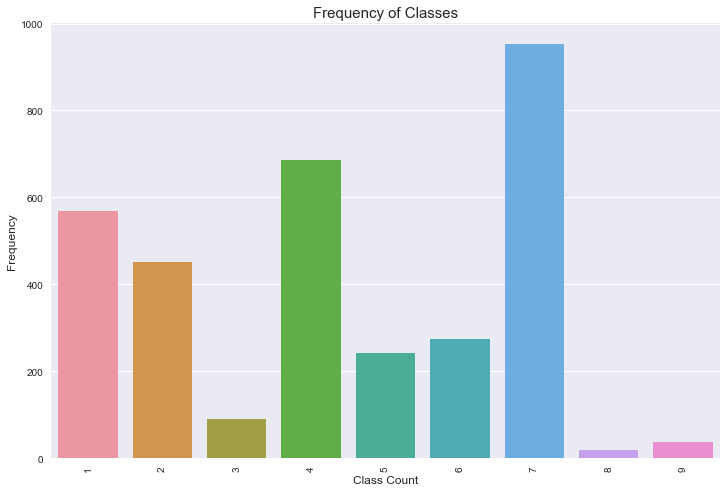

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=trainV)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=15)
plt.show()

In [35]:
train_genes = trainV.groupby('Gene')['Gene'].count()
print train_genes.head()
print ('\nGene Count {}'.format(len(train_genes)))

Gene
ABL1     26
ACVR1     3
AGO2      5
AKT1     28
AKT2     11
Name: Gene, dtype: int64

Gene Count 264


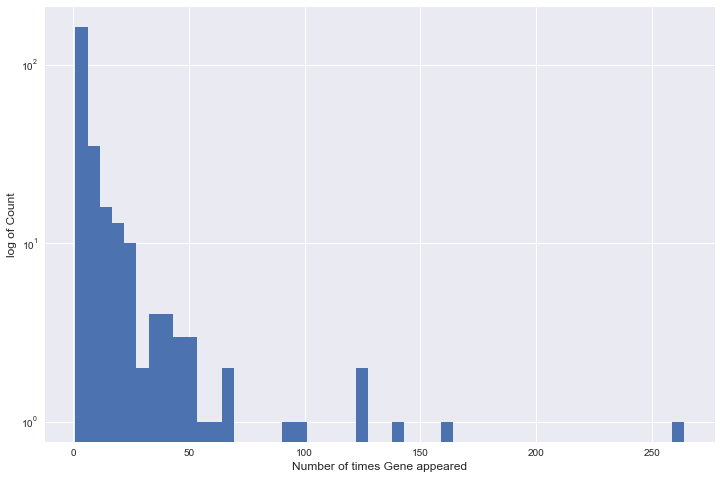

In [36]:
plt.figure(figsize=(12, 8))
plt.hist(train_genes.values, bins=50, log=True)
plt.xlabel('Number of times Gene appeared', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.show()

In [37]:
train_variation = trainV.groupby('Variation')['Variation'].count()
print train_variation.head()
print ('\nVariation Count {}'.format(len(train_variation)))

Variation
1_2009trunc       1
2010_2471trunc    1
256_286trunc      1
3' Deletion       1
385_418del        1
Name: Variation, dtype: int64

Variation Count 2996


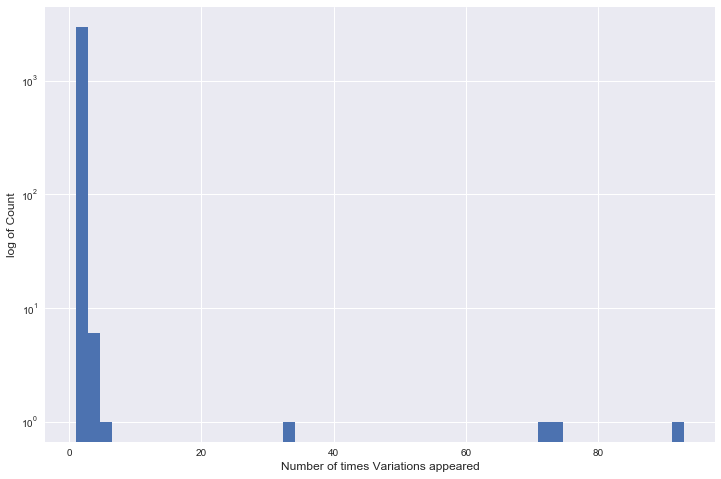

In [38]:
plt.figure(figsize=(12, 8))
plt.hist(train_variation.values, bins=50, log=True)
plt.xlabel('Number of times Variations appeared', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.show()

In [39]:
train_text_df["Text_num_words"] = train_text_df["Text"].apply(lambda x: len(str(x).split()))
train_text_df["Text_num_chars"] = train_text_df["Text"].apply(lambda x: len(str(x)))

In [42]:
train_text_df.head(1)

,ID,Text,Text_num_words,Text_num_chars
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,6089,39766


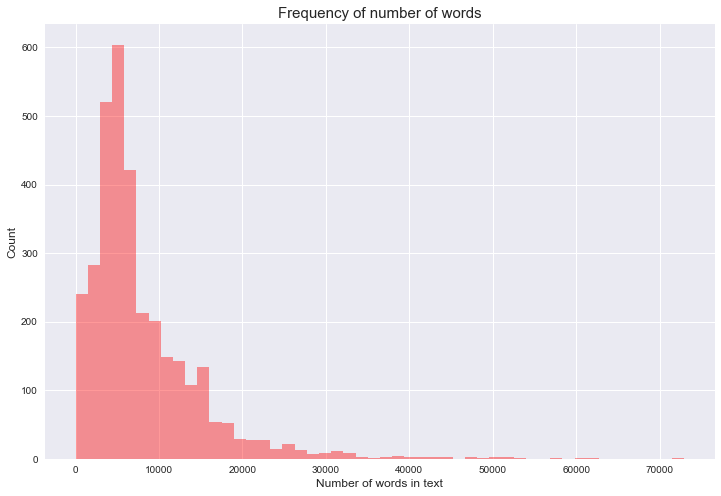

In [43]:
plt.figure(figsize=(12, 8))
sns.distplot(train_text_df.Text_num_words.values, bins=50, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of number of words", fontsize=15)
plt.show()